## 1. Import the Necessary Packages

Before running the code, make sure you have all the required packages installed.

You can set up a virtual environment and install all dependencies using a `requirements.txt` file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import warnings as wr
import seaborn as sns
from scipy.stats import skew, skewtest, kurtosis, kurtosistest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

wr.filterwarnings('ignore')

## 2. EDA & Understanding our data

In this section, we will perform **Exploratory Data Analysis (EDA)** to:

- Get a sense of the dataset structure
- Identify missing values, data types, and anomalies
- Explore feature distributions and relationships
- Understand class balance and potential data quality issues

In [2]:
test_df = pd.read_csv("../data/SBAcase.11.13.17.csv")
test_df.head(20)

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
5,1,1006295003,Ronald Lee Roberts,SACRAMENTO,CA,95831,CALIFORNIA BANK & TRUST,CA,531210,15813,...,0,50000,25000,0,0,0.50,0,2520,18345.0,0
6,0,1015066002,SUPERIOR BROKERS REALTY,HUNTINGTON PARK,CA,90255,U.S. BANK NATIONAL ASSOCIATION,OH,531210,16841,...,247074,297500,223125,0,1,0.75,0,8070,24930.0,1
7,0,1015266003,LIBERTY REALTY CO,LONG BEACH,CA,90808,JPMORGAN CHASE BANK NATL ASSOC,NV,531210,16841,...,0,30000,15000,1,0,0.50,0,2520,19380.0,0
8,0,1018975003,"SOUTHLAND MGT., CO.",SANTA ANA,CA,92704,BANK OF AMERICA NATL ASSOC,NC,531390,16252,...,35333,50000,25000,0,0,0.50,0,660,16943.0,1
9,1,1022515008,"AMR Appraisals, Inc.",SAN RAMON,CA,94583,BANK OF AMERICA NATL ASSOC,NC,531320,16264,...,0,10000,5000,1,0,0.50,0,2520,18834.0,0


### 2.1 Columns Descriptions

Based on the original dataset and available sources, we have the following understanding of each column:<br>
(For more information on the dataset refer to the `README.md` file)

| Variable Name        | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `LoanNr_ChkDgt`      | Identifier – Primary key                                                    |
| `Name`               | Borrower name                                                               |
| `City`               | Borrower city                                                               |
| `State`              | Borrower state                                                              |
| `Zip`                | Borrower ZIP code                                                           |
| `Bank`               | Bank name                                                                   |
| `BankState`          | Bank state                                                                  |
| `NAICS`              | North American Industry Classification System code                          |
| `ApprovalDate`       | Date SBA commitment was issued                                              |
| `ApprovalFY`         | Fiscal year of loan commitment                                              |
| `Term`               | Loan term in months                                                         |
| `NoEmp`              | Number of business employees                                                |
| `NewExist`           | Business type: 1 = Existing, 2 = New                                        |
| `CreateJob`          | Number of jobs created                                                      |
| `RetainedJob`        | Number of jobs retained                                                     |
| `FranchiseCode`      | Franchise code (`00000` or `00001` = No franchise)                          |
| `UrbanRural`         | 1 = Urban, 2 = Rural, 0 = Undefined                                          |
| `RevLineCr`          | Revolving line of credit (Y = Yes, N = No)                                  |
| `LowDoc`             | LowDoc Loan Program participation (Y = Yes, N = No)                         |
| `ChgOffDate`         | Date when the loan was charged off (if defaulted)                           |
| `DisbursementDate`   | Date when the loan funds were disbursed                                     |
| `DisbursementGross`  | Amount disbursed to the borrower                                            |
| `BalanceGross`       | Gross amount outstanding                                                    |
| `MIS_Status`         | Loan status: CHGOFF (Charged off) or PIF (Paid in full)                     |
| `ChgOffPrinGr`       | Amount of principal charged off                                             |
| `GrAppv`             | Gross amount of loan approved by the bank                                   |
| `SBA_Appv`           | Portion of the loan guaranteed by the SBA                                   |
| `New`                | 1 if NewExist = 2 (New business), 0 if NewExist = 1 (Existing business)     |
| `Portion`            | Proportion of the loan guaranteed by the SBA                                |
| `RealEstate`         | 1 if the loan is backed by real estate, 0 otherwise                         |
| `Recession`          | 1 if the loan was active during the Great Recession, 0 otherwise            |
| `Selected`           | 1 if selected for training, 0 if selected for testing (assignment split)    |
| `Default`            | 1 if the loan was charged off (defaulted), 0 if paid in full                |
| `daysterm`           | Loan term in days (used in recession-related calculations)                  |
| `xx`                 | Extra variable created for recession feature generation                     |

### 2.2 Data Types and Missing Values

In [3]:
print(f"Shape of the dataset: {test_df.shape} \nDataset information:")
print(test_df.info())

Shape of the dataset: (2102, 35) 
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   int64  
 1   LoanNr_ChkDgt      2102 non-null   int64  
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   int64  
 6   Bank               2099 non-null   object 
 7   BankState          2099 non-null   object 
 8   NAICS              2102 non-null   int64  
 9   ApprovalDate       2102 non-null   int64  
 10  ApprovalFY         2102 non-null   int64  
 11  Term               2102 non-null   int64  
 12  NoEmp              2102 non-null   int64  
 13  NewExist           2101 non-null   float64
 14  CreateJob          2102 non-null   int64  
 15  RetainedJob      

Most of the data types are either `float64` or `int64`, but there are 8 that are `object` types with which we probably have to deal with in order to do a precise selecting of model building variables.<br>
The usual tendency is that a column has 0 null values, which shows good data consistency, but what stands out from the rest is the **ChgOffDate** column that has 697 non-null values out of the 2102. <br>
Upon closer inspection and previous dataset knowledge, we know that this column only has information if the loan was defaulted and it was written off in the books of the loaner. Nonetheless, we will have to deal with this inconsistency.



### 2.3 Data Cleaning and Pre-processing for EDA

Before performing Exploratory Data Analysis (EDA), it is crucial to clean and preprocess the dataset to ensure the analysis is accurate and meaningful and our test do not fail.

In [4]:
test_df[test_df['ChgOffDate'].isna()]

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1,9893874006,MEGA VIDEO & WIRELESS HIGHLAND,HIGHLAND,CA,92346,UNITI BANK,CA,532230,16838,...,0,150000,75000,1,0,0.50,0,1800,18691.0,0
2098,1,9901143004,MOVING CONNECTION & CARL'S TRA,EL CAJON,CA,92021,ZIONS FIRST NATIONAL BANK,UT,532120,13530,...,0,99000,79200,0,1,0.80,0,9000,22545.0,0
2099,0,9903293007,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,93012,CITY NATIONAL BANK,CA,532120,13531,...,0,50000,40000,0,0,0.80,0,2520,16124.0,0
2100,1,9925643006,TAHOE MOTION PICTURE RENTALS,SUN VALLEY,CA,91352,CITY NATIONAL BANK,CA,532120,13542,...,0,500000,375000,0,0,0.75,0,3600,17265.0,0


The column `ChgOffDate` is only present when a loan has defaulted. Including this column in the model would heavily influence the prediction of the target variable (`y`), because it essentially gives away the answer.

Since `ChgOffDate` is **only filled in after a default**, its presence directly signals that the loan has already defaulted. This leads to **target leakage**, where the model learns from information that would not be available at prediction time.

In real-world use, when predicting whether a new loan will default, `ChgOffDate` will always be missing—because the loan has not defaulted yet. Keeping this column in the training data would cause the model to rely on a feature that will never be available in production, resulting in unrealistic and misleading predictions.

In [5]:
test_df = test_df.drop(columns=['ChgOffDate', 'MIS_Status', 'ChgOffPrinGr', 'Selected'])

In [6]:
test_df.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 3
BankState            3
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             1
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            2
LowDoc               3
DisbursementDate     3
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
New                  0
RealEstate           0
Portion              0
Recession            0
daysterm             0
xx                   3
Default              0
dtype: int64

We will drop rows with missing values since we can't replacate them and there is not much data that will be missing

In [7]:
test_df = test_df.dropna()

### 2.4 Dataset Description
After cleaning up the data a little bit in order to observe any patterns and tendencies in the data, we need to generate a basic **descriptive summary** of the dataset.

In [8]:
desc = test_df.describe()
desc.loc['median'] = test_df.median(numeric_only=True)
stats_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
desc = desc.reindex(stats_order)
desc

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,...,BalanceGross,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2.090000e+03,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,...,2090.0,2.090000e+03,2.090000e+03,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,4.463471e+09,92699.144019,531629.955024,16186.136364,2004.053110,127.122010,10.174163,1.153589,2.558852,5.822967,...,0.0,2.335288e+05,1.895656e+05,0.154067,0.275598,0.670636,0.068900,3813.660287,20084.612919,0.327751
median,3.600864e+09,92559.500000,531312.000000,16558.500000,2005.000000,84.000000,3.000000,1.000000,0.000000,2.000000,...,0.0,6.250000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
std,2.530834e+09,1877.729217,522.025855,1436.543266,3.957717,93.914146,34.495965,0.361965,8.031510,19.027964,...,0.0,3.441703e+05,2.994306e+05,0.361099,0.446922,0.186490,0.253344,2817.424388,2849.762378,0.469506
min,1.004285e+09,65757.000000,531110.000000,10611.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,4.500000e+03,2.250000e+03,0.000000,0.000000,0.296770,0.000000,0.000000,11524.000000,0.000000
25%,2.379915e+09,91402.000000,531210.000000,15713.000000,2003.000000,60.000000,2.000000,1.000000,0.000000,1.000000,...,0.0,3.000000e+04,1.500000e+04,0.000000,0.000000,0.500000,0.000000,1800.000000,18324.500000,0.000000
50%,3.600864e+09,92559.500000,531312.000000,16558.500000,2005.000000,84.000000,3.000000,1.000000,0.000000,2.000000,...,0.0,6.250000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
75%,6.545109e+09,94127.750000,532230.000000,17148.750000,2007.000000,240.000000,8.000000,1.000000,2.000000,5.000000,...,0.0,3.000000e+05,2.397562e+05,0.000000,1.000000,0.850000,0.000000,7200.000000,22375.000000,1.000000
max,9.925643e+09,96161.000000,533110.000000,18609.000000,2011.000000,306.000000,650.000000,2.000000,130.000000,535.000000,...,0.0,2.350000e+06,2.115000e+06,1.000000,1.000000,1.000000,1.000000,9180.000000,27598.000000,1.000000


### 2.5 Visualization & Transforming

To better understand our data we will some of them to see if they would be good variables


In [9]:
test_df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate     float64
DisbursementGross      int64
BalanceGross           int64
GrAppv                 int64
SBA_Appv               int64
New                    int64
RealEstate             int64
Portion              float64
Recession              int64
daysterm               int64
xx                   float64
Default                int64
dtype: object

Before visualaizing the data we have to deal with the object data types so that we can iterate through all of the columns

In [10]:
print(test_df[['RevLineCr', 'LowDoc']].head(5))
print(test_df['RevLineCr'].unique())
print(test_df['LowDoc'].unique())

  RevLineCr LowDoc
0         Y      N
1         Y      N
2         Y      N
3         Y      N
4         0      N
['Y' '0' 'N' 'T']
['N' 'Y' 'S' 'A' '0']


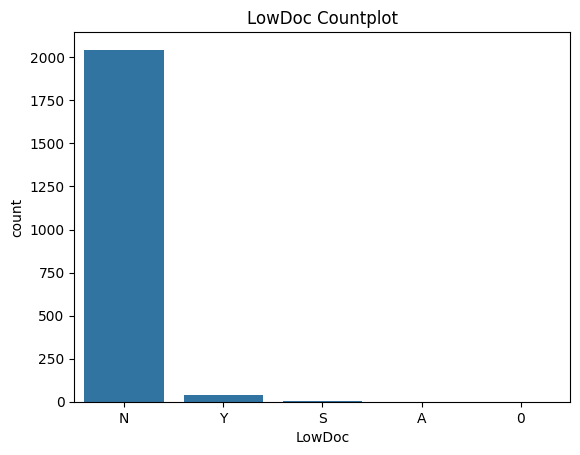

LowDoc
N    2044
Y      41
S       3
A       1
0       1
Name: count, dtype: int64

In [11]:
sns.countplot(data=test_df, x='LowDoc')
plt.title('LowDoc Countplot')
plt.show()
test_df['LowDoc'].value_counts()

In [12]:
test_df['LowDoc'] = np.where(test_df['LowDoc'] == 'Y', 1 , test_df['LowDoc'])
test_df['LowDoc'] = np.where(test_df['LowDoc'] == 'N', 0 , test_df['LowDoc'])
test_df['LowDoc'] = np.where(test_df['LowDoc'] == '0', 0 , test_df['LowDoc'])
test_df = test_df[~test_df['LowDoc'].isin(['S', 'A'])]
test_df['LowDoc'] = test_df['LowDoc'].astype('int64')
test_df['LowDoc'].value_counts()

LowDoc
0    2045
1      41
Name: count, dtype: int64

I cleared up the LowDoc not on to RevLineCr column

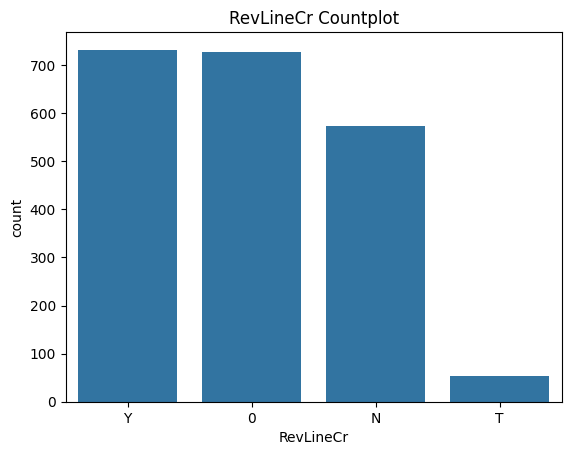

RevLineCr
Y    732
0    728
N    573
T     53
Name: count, dtype: int64

In [13]:
sns.countplot(data=test_df, x='RevLineCr')
plt.title('RevLineCr Countplot')
plt.show()
test_df['RevLineCr'].value_counts()

In [14]:
test_df['RevLineCr'] = np.where(test_df['RevLineCr'] == 'Y', 1 , test_df['RevLineCr'])
test_df['RevLineCr'] = np.where(test_df['RevLineCr'] == 'N', 0 , test_df['RevLineCr'])
test_df['RevLineCr'] = np.where(test_df['RevLineCr'] == '0', 0 , test_df['RevLineCr'])
test_df = test_df[~test_df['RevLineCr'].isin(['T'])]
test_df['RevLineCr'] = test_df['RevLineCr'].astype('int64')
test_df['RevLineCr'].value_counts()

RevLineCr
0    1301
1     732
Name: count, dtype: int64

In [15]:
test_df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr              int64
LowDoc                 int64
DisbursementDate     float64
DisbursementGross      int64
BalanceGross           int64
GrAppv                 int64
SBA_Appv               int64
New                    int64
RealEstate             int64
Portion              float64
Recession              int64
daysterm               int64
xx                   float64
Default                int64
dtype: object

LoanNr_ChkDgt - Skewness and kurtosis test: 
Skewness 0.533
z-pointvalue: 9.259
P-value: 0.000

Kurtois -1.032
z-pointvalue: -23.127
P-value: 0.000



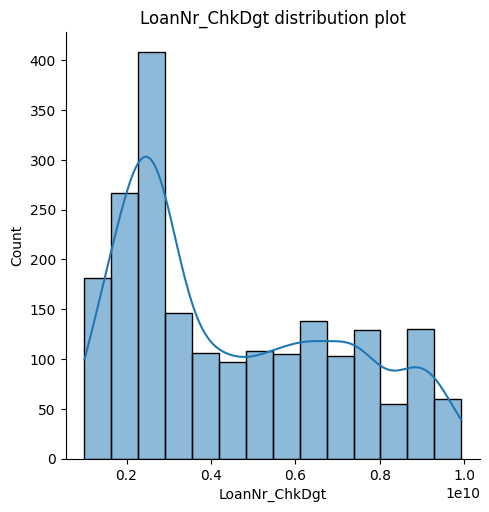

Zip - Skewness and kurtosis test: 
Skewness -1.463
z-pointvalue: -20.354
P-value: 0.000

Kurtois 20.699
z-pointvalue: 22.773
P-value: 0.000



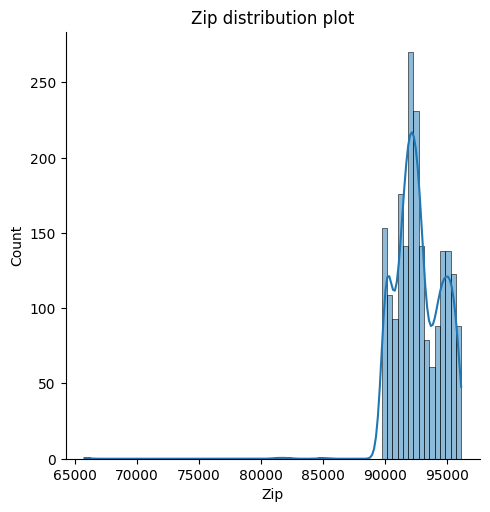

NAICS - Skewness and kurtosis test: 
Skewness 0.667
z-pointvalue: 11.262
P-value: 0.000

Kurtois -1.193
z-pointvalue: -39.306
P-value: 0.000



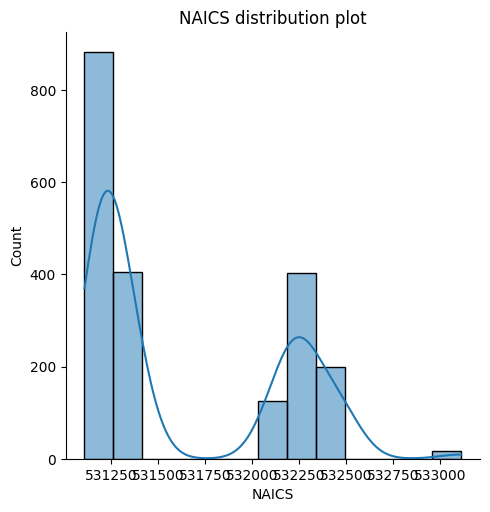

ApprovalDate - Skewness and kurtosis test: 
Skewness -1.632
z-pointvalue: -21.815
P-value: 0.000

Kurtois 2.926
z-pointvalue: 12.032
P-value: 0.000



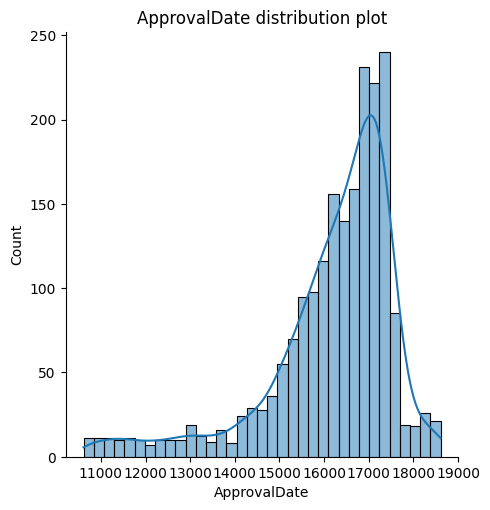

ApprovalFY - Skewness and kurtosis test: 
Skewness -1.598
z-pointvalue: -21.528
P-value: 0.000

Kurtois 2.823
z-pointvalue: 11.824
P-value: 0.000



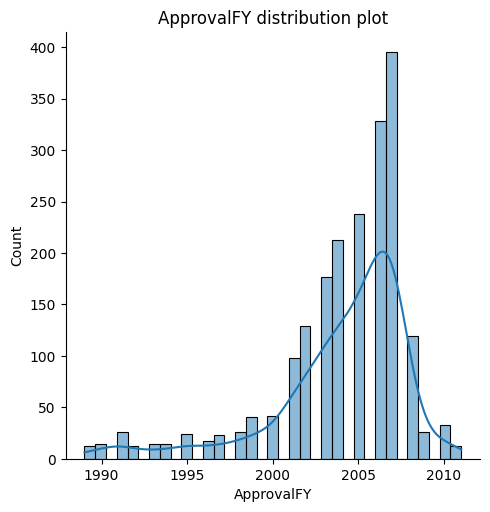

Term - Skewness and kurtosis test: 
Skewness 0.785
z-pointvalue: 12.887
P-value: 0.000

Kurtois -0.944
z-pointvalue: -18.390
P-value: 0.000



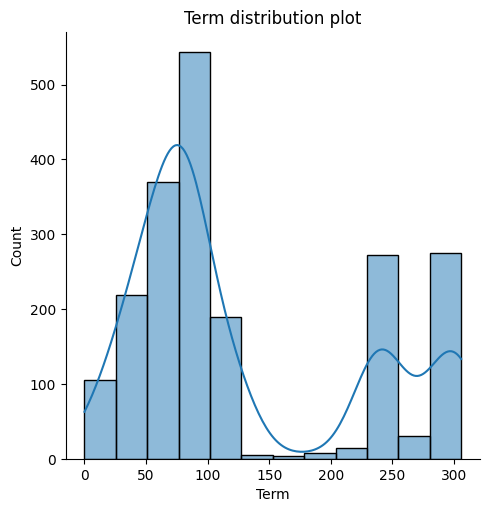

NoEmp - Skewness and kurtosis test: 
Skewness 12.119
z-pointvalue: 51.364
P-value: 0.000

Kurtois 181.359
z-pointvalue: 30.239
P-value: 0.000



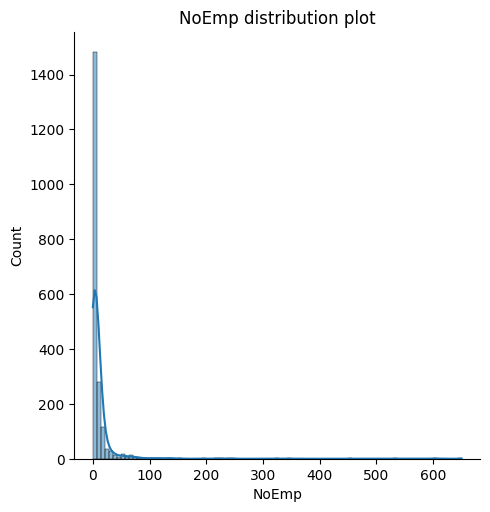

NewExist - Skewness and kurtosis test: 
Skewness 1.897
z-pointvalue: 23.880
P-value: 0.000

Kurtois 1.713
z-pointvalue: 9.031
P-value: 0.000



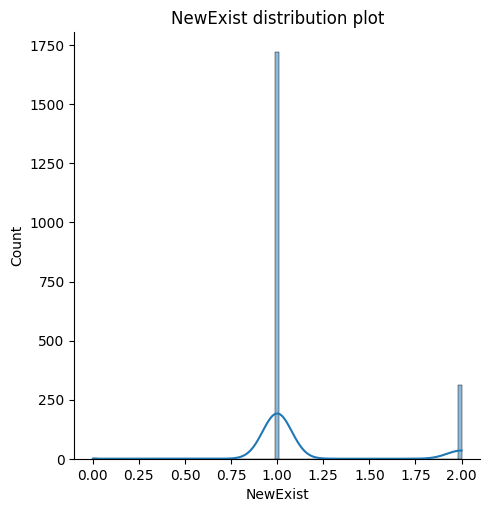

CreateJob - Skewness and kurtosis test: 
Skewness 7.689
z-pointvalue: 44.487
P-value: 0.000

Kurtois 79.143
z-pointvalue: 27.947
P-value: 0.000



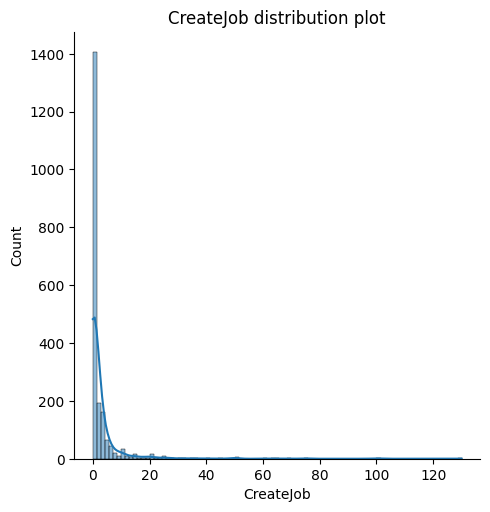

RetainedJob - Skewness and kurtosis test: 
Skewness 15.341
z-pointvalue: 54.933
P-value: 0.000

Kurtois 340.021
z-pointvalue: 31.611
P-value: 0.000



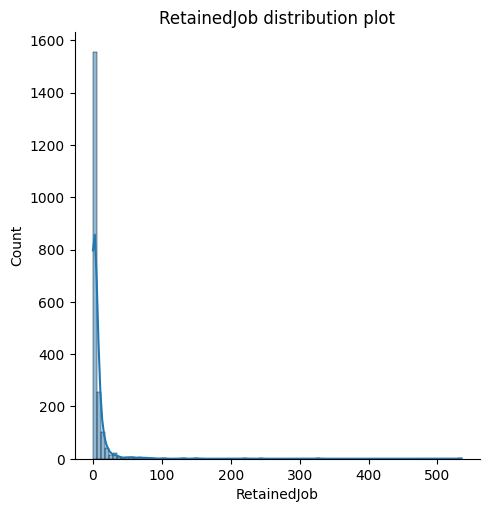

FranchiseCode - Skewness and kurtosis test: 
Skewness 6.013
z-pointvalue: 40.786
P-value: 0.000

Kurtois 35.873
z-pointvalue: 25.137
P-value: 0.000



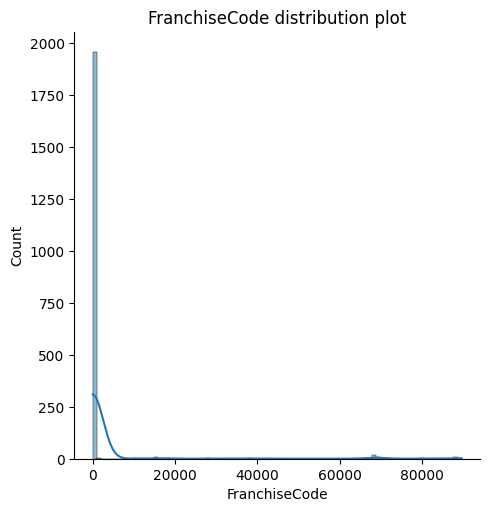

UrbanRural - Skewness and kurtosis test: 
Skewness -0.338
z-pointvalue: -6.088
P-value: 0.000

Kurtois 2.694
z-pointvalue: 11.554
P-value: 0.000



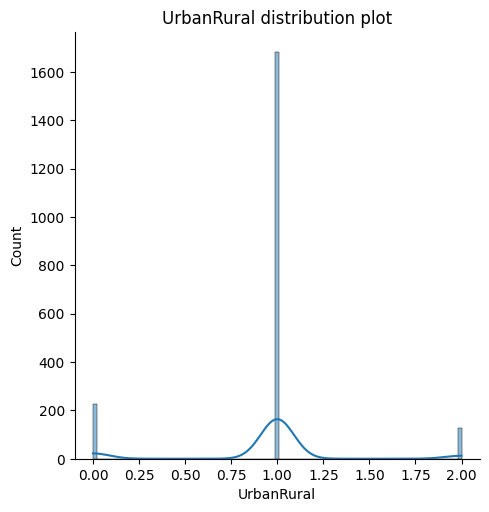

RevLineCr - Skewness and kurtosis test: 
Skewness 0.583
z-pointvalue: 10.026
P-value: 0.000

Kurtois -1.660
z-pointvalue: 98.656
P-value: 0.000



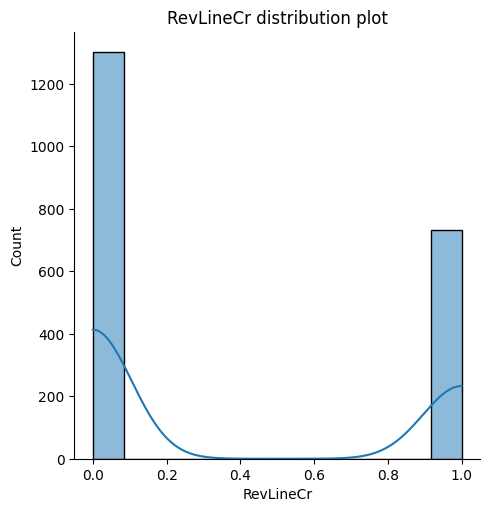

LowDoc - Skewness and kurtosis test: 
Skewness 6.827
z-pointvalue: 42.695
P-value: 0.000

Kurtois 44.606
z-pointvalue: 25.978
P-value: 0.000



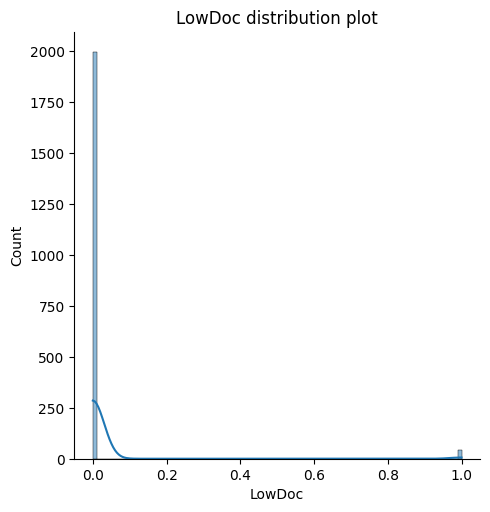

DisbursementDate - Skewness and kurtosis test: 
Skewness -1.634
z-pointvalue: -21.830
P-value: 0.000

Kurtois 2.918
z-pointvalue: 12.017
P-value: 0.000



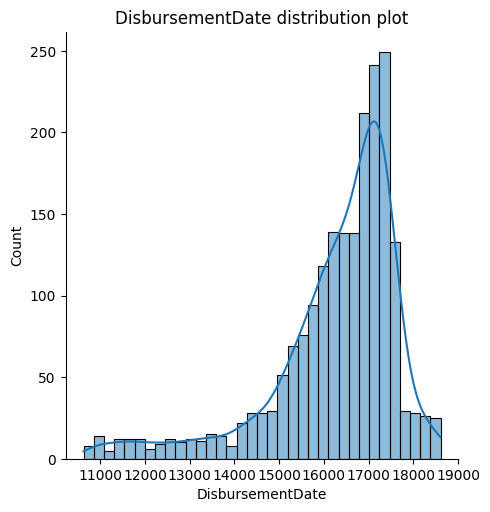

DisbursementGross - Skewness and kurtosis test: 
Skewness 2.322
z-pointvalue: 26.738
P-value: 0.000

Kurtois 5.992
z-pointvalue: 16.237
P-value: 0.000



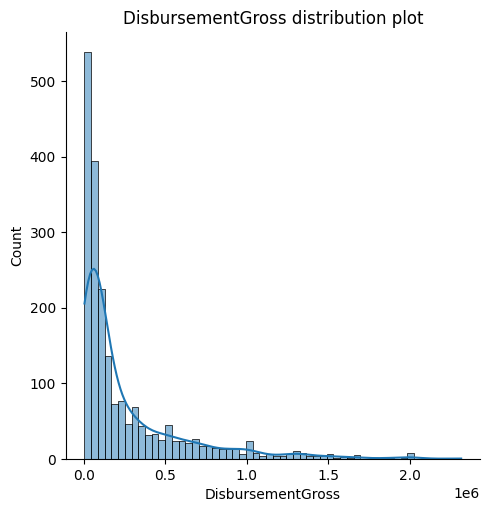

BalanceGross - Skewness and kurtosis test: 
Skewness nan
z-pointvalue: nan
P-value: nan

Kurtois nan
z-pointvalue: nan
P-value: nan



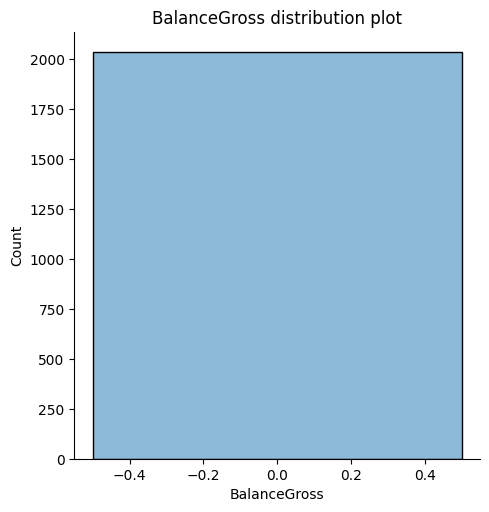

GrAppv - Skewness and kurtosis test: 
Skewness 2.300
z-pointvalue: 26.598
P-value: 0.000

Kurtois 5.806
z-pointvalue: 16.055
P-value: 0.000



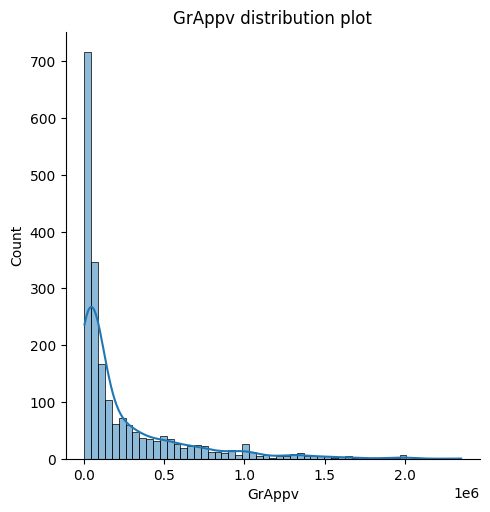

SBA_Appv - Skewness and kurtosis test: 
Skewness 2.376
z-pointvalue: 27.063
P-value: 0.000

Kurtois 6.297
z-pointvalue: 16.524
P-value: 0.000



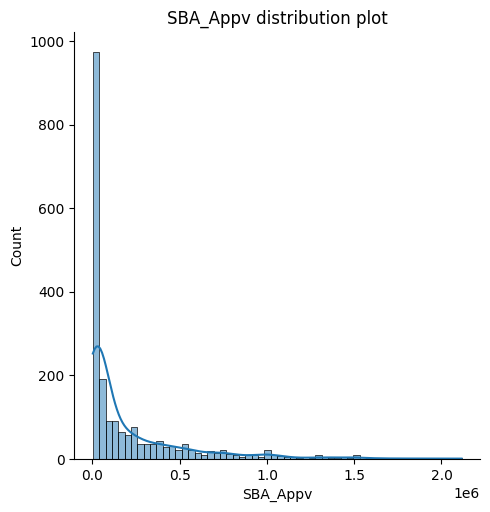

New - Skewness and kurtosis test: 
Skewness 1.923
z-pointvalue: 24.070
P-value: 0.000

Kurtois 1.697
z-pointvalue: 8.984
P-value: 0.000



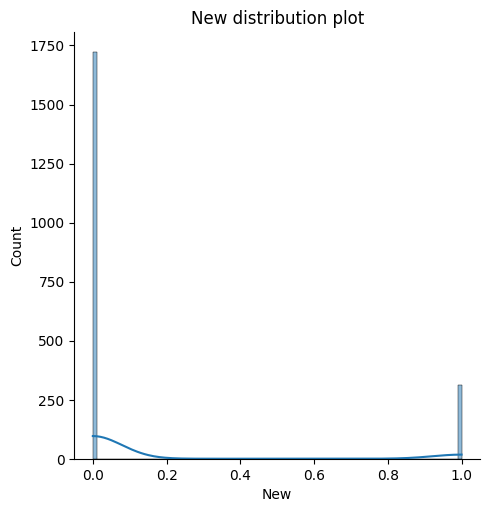

RealEstate - Skewness and kurtosis test: 
Skewness 0.962
z-pointvalue: 15.130
P-value: 0.000

Kurtois -1.075
z-pointvalue: -26.157
P-value: 0.000



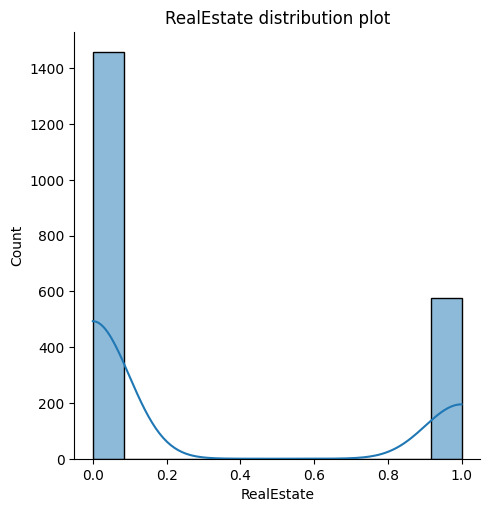

Portion - Skewness and kurtosis test: 
Skewness 0.425
z-pointvalue: 7.530
P-value: 0.000

Kurtois -1.295
z-pointvalue: -71.417
P-value: 0.000



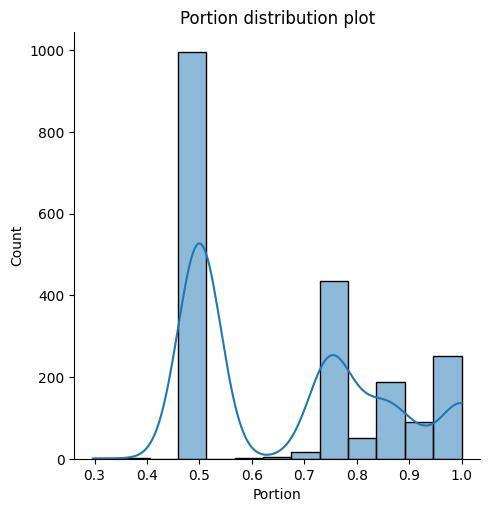

Recession - Skewness and kurtosis test: 
Skewness 3.451
z-pointvalue: 32.505
P-value: 0.000

Kurtois 9.912
z-pointvalue: 19.068
P-value: 0.000



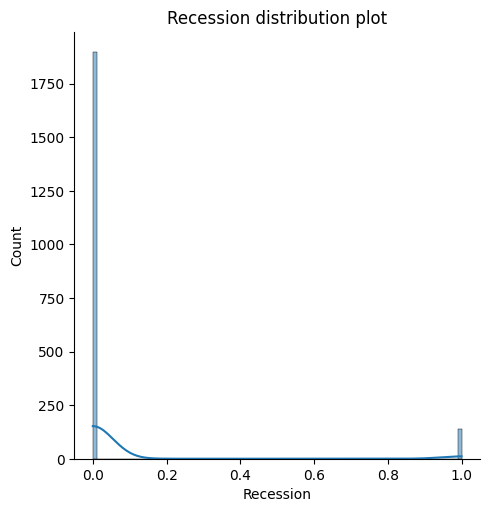

daysterm - Skewness and kurtosis test: 
Skewness 0.785
z-pointvalue: 12.887
P-value: 0.000

Kurtois -0.944
z-pointvalue: -18.390
P-value: 0.000



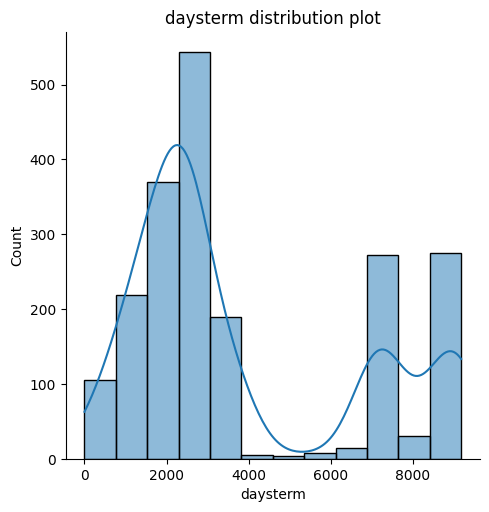

xx - Skewness and kurtosis test: 
Skewness 0.477
z-pointvalue: 8.379
P-value: 0.000

Kurtois -0.452
z-pointvalue: -5.369
P-value: 0.000



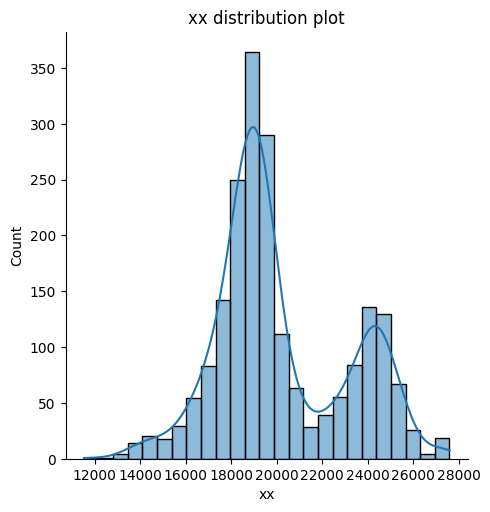

Default - Skewness and kurtosis test: 
Skewness 0.807
z-pointvalue: 13.189
P-value: 0.000

Kurtois -1.348
z-pointvalue: -334.912
P-value: 0.000



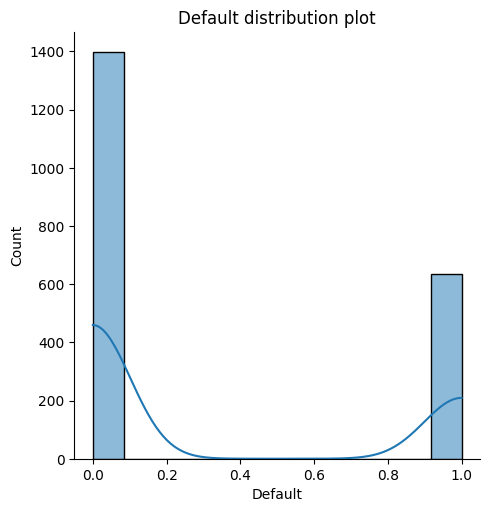

In [16]:
for column_name in test_df.drop(columns=['Bank', 'BankState', 'State', 'City', 'Name']).columns:
    sns.displot(test_df, x=column_name, kde = True)
    plt.title(column_name + " distribution plot")
    row_var = test_df[column_name]
    f = skew(row_var)
    zpoint, p_value = skewtest(row_var)
    print(f"{column_name} - Skewness and kurtosis test: \nSkewness {f:.3f}\nz-pointvalue: {zpoint:.3f}\nP-value: {p_value:.3f}\n")
    c = kurtosis(row_var)
    zpoint, p_value = kurtosistest(row_var)
    print(f"Kurtois {c:.3f}\nz-pointvalue: {zpoint:.3f}\nP-value: {p_value:.3f}\n")
    plt.show()

The dataset contains a mix of distribution shapes, with normal distributions being uncommon. Many features show noticeable skewness (both left and right) and non-zero kurtosis, indicating asymmetry and deviation from normality.


## 3. Inspecting the Independent Variable and Creating Dummies
We want to predict the likelehood of defaulting on loan so our dependent variable is the **Default** column

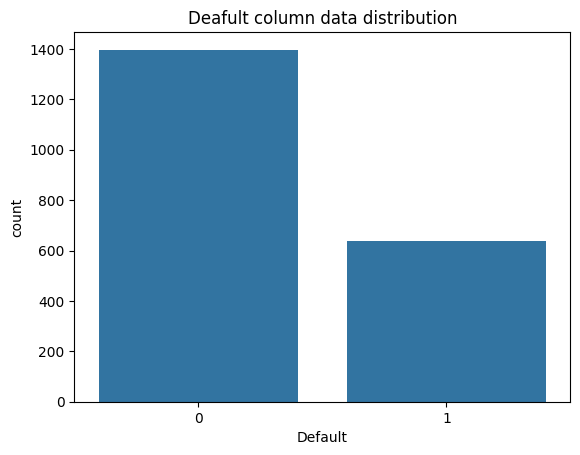

Default
0    1397
1     636
Name: count, dtype: int64

In [17]:
ins_df = test_df.copy()
sns.countplot(ins_df, x='Default')
plt.title('Deafult column data distribution')
plt.show()
ins_df['Default'].value_counts()

The dependent variable is heavely disbalanced so we have to deal with this to have a better predicting model but first we create dummy variables

In [18]:
ins_df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr              int64
LowDoc                 int64
DisbursementDate     float64
DisbursementGross      int64
BalanceGross           int64
GrAppv                 int64
SBA_Appv               int64
New                    int64
RealEstate             int64
Portion              float64
Recession              int64
daysterm               int64
xx                   float64
Default                int64
dtype: object

In [19]:
dummy_vars = ['Name', 'City','State','Bank', 'BankState']
for item in dummy_vars:
    dummy_list = pd.get_dummies(data=ins_df[item], prefix=item, drop_first=True)
    ins_df = ins_df.join(dummy_list)

data_vars = ins_df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in dummy_vars]
data_final=ins_df[to_keep]
pd.set_option('display.max_columns', None)  # Show all columns
print(data_final.columns)

Index(['LoanNr_ChkDgt', 'Zip', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term',
       'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       ...
       'BankState_NV', 'BankState_NY', 'BankState_OH', 'BankState_OR',
       'BankState_RI', 'BankState_SC', 'BankState_SD', 'BankState_TX',
       'BankState_UT', 'BankState_VA'],
      dtype='object', length=2650)


In [20]:
data_final.head(5)

LoanNr_ChkDgt    Zip   NAICS  ApprovalDate  ApprovalFY  Term  NoEmp  \
0     1004285007  92801  532420         15074        2001    36      1   
1     1004535010  90505  531210         15130        2001    56      1   
2     1005005006  92103  531210         15188        2001    36     10   
3     1005535001  92108  531312         15719        2003    36      6   
4     1005996006  91345  531390         16840        2006   240     65   

   NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  \
0       1.0          0            0              1           0          1   
1       1.0          0            0              1           0          1   
2       1.0          0            0              1           0          1   
3       1.0          0            0              1           0          1   
4       1.0          3           65              1           1          0   

   LowDoc  DisbursementDate  DisbursementGross  BalanceGross  GrAppv  \
0       0           15095.0              32812             0   30000   
1       0           15978.0              30000             0   30000   
2       0           15218.0              30000             0   30000   
3       0           15736.0              50000             0   50000   
4       0           16903.0             343000             0  343000   

   SBA_Appv  New  RealEstate  Portion  Recession  daysterm       xx  Default  \
0     15000    0           0      0.5          0      1080  16175.0        0   
1     15000    0           0      0.5          1      1680  17658.0        0   
2     15000    0           0      0.5          0      1080  16298.0        0   
3     25000    0           0      0.5          0      1080  16816.0        0   
4    343000    0           1      1.0          0      7200  24103.0        0   

   Name_1101 ORANGEWOOD LLC EPC  Name_12K PROPERTIES LLC  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False                    False   
4                         False                    False   

   Name_1ST CHOICE RV INC  Name_1ST COMPUTER & NETWORK SOLUTIO  \
0                   False                                False   
1                   False                                False   
2                   False                                False   
3                   False                                False   
4                   False                                False   

   Name_20/20 CLEANERS  Name_20/20 VIDEO  Name_20/20 VIDEO & BASKIN ROBBINS  \
0                False             False                              False   
1                False             False                              False   
2                False             False                              False   
3                False             False                              False   
4                False             False                              False   

   Name_2003 MINA POURANG FAMILY TRUST  Name_345 VIDEO  \
0                                False           False   
1                                False           False   
2                                False           False   
3                                False           False   
4                                False           False   

   Name_4 SEASONS REALTY OF TEHACHAPI  Name_4388 TUJUNGA AVE., LLC, A CALI  \
0                               False                                False   
1                               False                                False   
2                               False                                False   
3                               False                                False   
4                               False                                False   

   Name_50/50 ENTERTAINMENT INC  Name_699 RENT A CAR HOLLYWOOD  \
0                         False                          False  

## 4. Using SMOTE to balance the data

In [21]:
X = data_final.loc[:, data_final.columns != 'Default']
y = data_final.loc[:, data_final.columns == 'Default']

os = SMOTE(random_state=0) # we set zero so it stays reproductiable 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns 

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Default'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Default']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Default']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Default']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Default']==1])/len(os_data_X))

length of oversampled data is  1972
Number of no subscription in oversampled data 986
Number of subscription 986
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [22]:
print(data_final.shape)
print(os_data_X.shape)
print(os_data_y.shape)

(2033, 2650)
(1972, 2649)
(1972, 1)


## 5.RFE 

In [23]:
data_final_vars=data_final.columns.values.tolist()

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=20) # 20 means how many of the top features we want to select
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

# We select select the exact names of the columns
selected_idx   = rfe.get_support(indices=True)       # [ 8 11 13 25 ...]
print(selected_idx)
selected_names = os_data_X.columns[selected_idx]       # Index([...])
print("Choosen (20) features:", list(selected_names))

[False False False ... False False False]
[1799 1452 1440 ... 1407  141  340]
[   5   14   20   23   24   94  107  249  335  623 1943 2044 2204 2484
 2513 2623 2626 2639 2642 2645]
Choosen (20) features: ['Term', 'DisbursementDate', 'RealEstate', 'daysterm', 'xx', 'Name_ADVANTAGE VALUATION INC', 'Name_ALAN A CASTILLO', 'Name_BENCHMARK REALTY & FINANCE', 'Name_CALIFORNIA COASTAL REAL ESTATE', 'Name_F AND F FINANCIAL SERVICES', 'Name_XOCHITL ESCOBEDO', 'City_CHULA VISTA', 'City_MADERA', 'Bank_AURORA BANK FSB', 'Bank_CITIBANK, N.A.', 'Bank_WELLS FARGO BANK NATL ASSOC', 'Bank_WILSHIRE BANK', 'BankState_NV', 'BankState_OR', 'BankState_SD']


In [24]:
X = os_data_X[selected_names]
y = os_data_y['Default']

X = X.astype(float)
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary2().as_text())

         Current function value: 0.250056
         Iterations: 35
                                           Results: Logit
Model:                          Logit                        Method:                       MLE      
Dependent Variable:             Default                      Pseudo R-squared:             0.639    
Date:                           2025-07-28 12:24             AIC:                          1028.2227
No. Observations:               1972                         BIC:                          1145.5456
Df Model:                       20                           Log-Likelihood:               -493.11  
Df Residuals:                   1951                         LL-Null:                      -1366.9  
Converged:                      0.0000                       LLR p-value:                  0.0000   
No. Iterations:                 35.0000                      Scale:                        1.0000   
--------------------------------------------------------------------